## Geog 371 - Exploring Raster Imagery and Displaying Images in Python with Jupyter Notebooks 
This notebook shows you how markdown cells can be formatted and how to use the rasterio package to display images in a notebook and retrieve image information. Run all the cells in this notebook one-by-one, including this one.

Check this for a quick Markdown intro. Run the cell to see the formatted version (might have to scroll back up). Double-click formatted version to get back to editing mode.

from: https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet  (more info on this website than presented here)

# Formatting text - this is a Heading 1
## Heading 2
### Heading 3
#### Heading 4
##### H5 you get...
###### H6 ...the point

### Emphasis, aka italics, with *asterisks* or _underscores_.

Strong emphasis, aka bold, with **asterisks** or __underscores__.

Combined emphasis with **asterisks and _underscores_**.

Strikethrough uses two tildes. ~~Scratch this.~~

### Images
Here's a logo (hover to see the title text). You can also use links to local files on your computer.

Inline-style: 
![alt text](https://github.com/adam-p/markdown-here/raw/master/src/common/images/icon48.png "Logo Title Text 1")

Reference-style: 
![alt text][logo]

[logo]: https://github.com/adam-p/markdown-here/raw/master/src/common/images/icon48.png "Logo Title Text 2"

Another inline-style example with local file - the file must be in your root folder:
![Geddes](env-lab.jpg "Computer lab you can access remotely and might want to be at for real maybe.")

### Tables

There must be at least 3 dashes separating each header cell.
The outer pipes (|) are optional, and you don't need to make the 
raw Markdown line up prettily. You can also use inline Markdown.

Markdown | Table | Formatting
--- | --- | ---
*This* | `renders` | **nicely**
1 | 2 | 3

In [1]:
# Like in a Python script, hashtags in front of a line indicate comments.
# Just another quick useful tip. Try it with this cell.

print ('In a cell, press ESC key and "L" to get line numbers.')
print ('This can be helpful when dealing with errors that refer to line numbers.')


In a cell, press ESC key and "L" to get line numbers.
This can be helpful when dealing with errors that refer to line numbers.


### Using the rasterio package to display images and retrieve image information
You will use the Landsat 5 imagery in the KUL_L5 folder for this little exercise. In the cell below you will import the necessary packages first.

In [2]:
# Run this cell to import the required packages
import sys
import os
import rasterio
import numpy as np
from rasterio import plot
from rasterio.plot import show
import matplotlib.pyplot as plt


In the code cell below you will define your input directories and files. Note: If not using the 'r' in front of a path, Python interprets e.g. '\t' as a tab character and the path is messed up. So if there is a 't' in front of a folder name (e.g. your username starts with a 't'), the path doesn't work. Using 'r' in this case indicates a raw string and takes the string as is.

In [3]:
# You need to change the homefolder variable with your home folder (the g371-env one) according to your setup.
# Your A1 files need to be in your home folder
homefolder = r'C:\Users\reags\g371-env'
print ('homefolder: ', homefolder)

# Assembling the file paths for the red and NIR band files and printing the results
blueband = os.path.join (homefolder, 'KUL_L5', 'L5127058_05820060302_B10.TIF')
greenband = os.path.join (homefolder, 'KUL_L5', 'L5127058_05820060302_B20.TIF')
redband = os.path.join (homefolder, 'KUL_L5', 'L5127058_05820060302_B30.TIF')
nirband = os.path.join (homefolder, 'KUL_L5', 'L5127058_05820060302_B40.TIF')
print ('blueband: ',redband)
print ('greenband: ',redband)
print ('redband: ',redband)
print ('nirband: ',nirband)


homefolder:  C:\Users\reags\g371-env
blueband:  C:\Users\reags\g371-env\KUL_L5\L5127058_05820060302_B30.TIF
greenband:  C:\Users\reags\g371-env\KUL_L5\L5127058_05820060302_B30.TIF
redband:  C:\Users\reags\g371-env\KUL_L5\L5127058_05820060302_B30.TIF
nirband:  C:\Users\reags\g371-env\KUL_L5\L5127058_05820060302_B40.TIF


In [4]:
# Now that you defined the blue, green, red and nir files, you can open them with rasterio and get some information.

# Using rasterio to open the bands.
blue = rasterio.open(blueband)
green = rasterio.open(greenband)
red = rasterio.open(redband)
nir = rasterio.open(nirband)

# Getting input band dimensions
print ('red band dimensions:')
print ('rows = ', red.height)
print ('columns =', red.width)
print ('')
print ('NIR band dimensions:')
print ('rows = ', nir.height)
print ('columns = ', nir. width)


red band dimensions:
rows =  6971
columns = 8091

NIR band dimensions:
rows =  6971
columns =  8091


# Image Display - SINGLE BAND

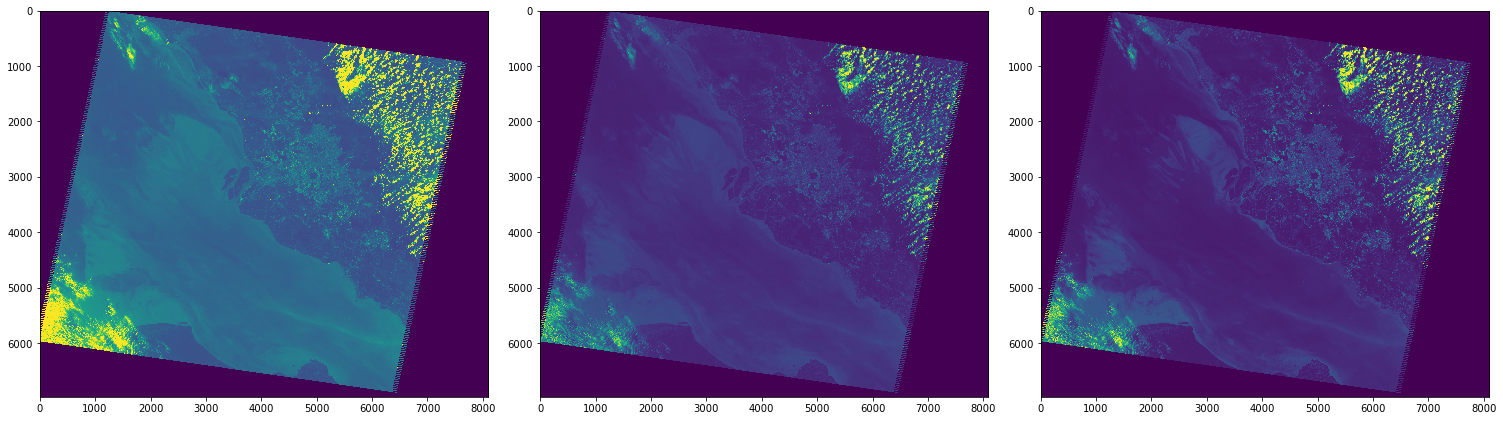

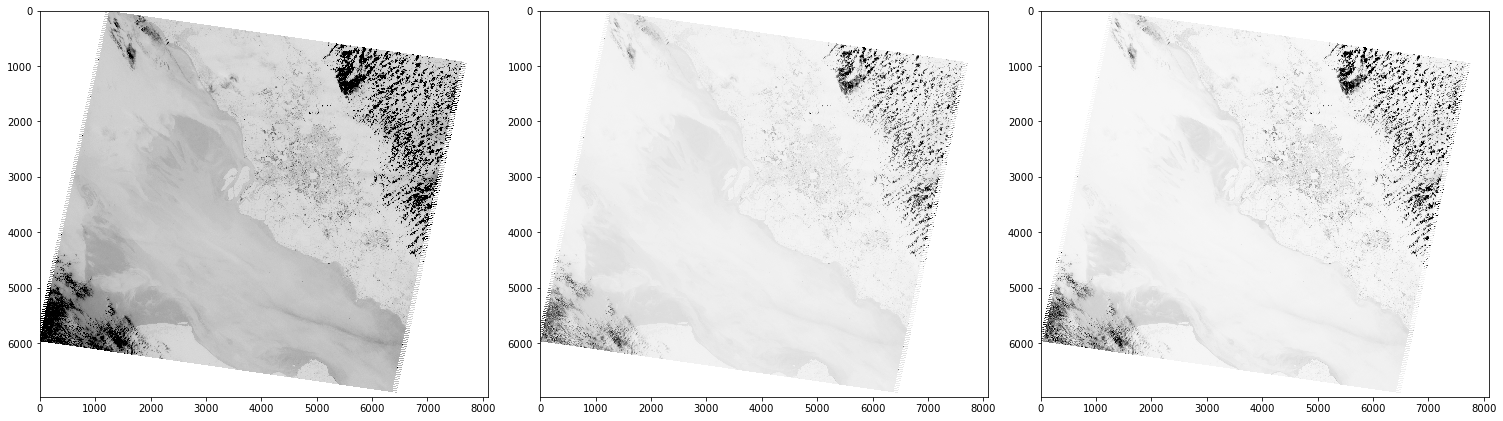

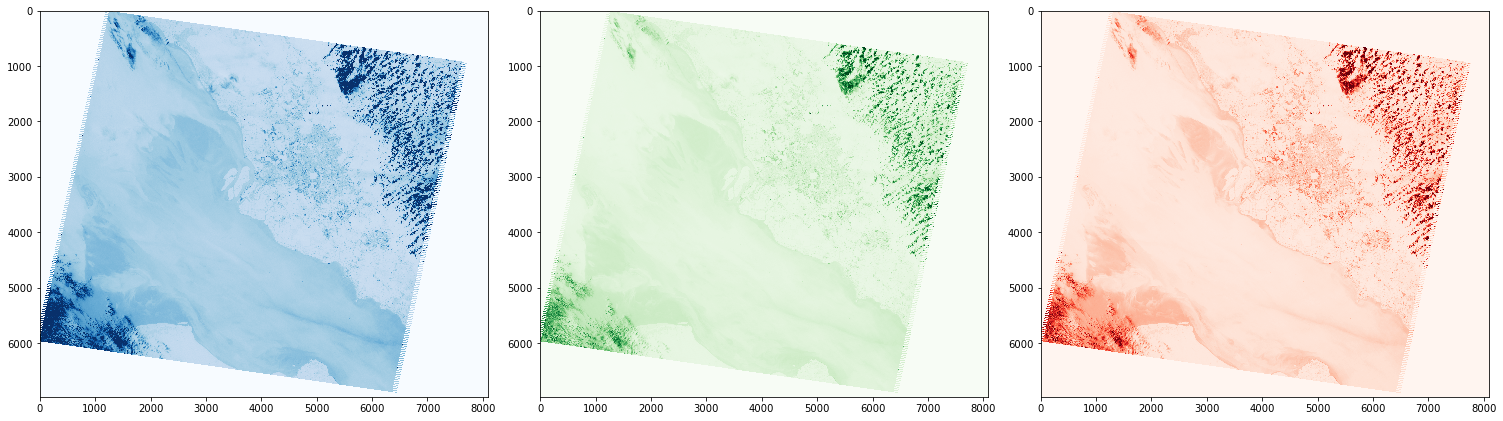

In [5]:
# You can plot the bands in different ways using matplotlib.

# Plotting the bands with a default colour option
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(21,7))
plot.show(blue, ax=ax1)
plot.show(green, ax=ax2)
plot.show(red, ax=ax3)
fig.tight_layout()

# Creating a multiple band representation, greyscale
fig, (ax4, ax5, ax6) = plt.subplots(1, 3, figsize=(21, 7))
plot.show(blue, ax=ax4, cmap='Greys') #blue
plot.show(green,  ax=ax5, cmap='Greys') #green
plot.show(red,  ax=ax6, cmap='Greys') #red
fig.tight_layout()

# Creating a multiple band representation, blue- green- and red-scale
fig, (ax7, ax8, ax9) = plt.subplots(1, 3, figsize=(21, 7))
plot.show(blue, ax=ax7, cmap='Blues') #blue
plot.show(green,  ax=ax8, cmap='Greens') #green
plot.show(red,  ax=ax9, cmap='Reds') #red
fig.tight_layout()

# Image display - MULTI-BAND COMPOSITE

Band Statistics
Red:   0 - 255 mean: 27.322233585221724
Green: 0 - 255 mean: 30.041852485572367
Blue:  0 - 255 mean: 66.22778168807508
NIR:   0 - 255 mean: 35.78082174609676


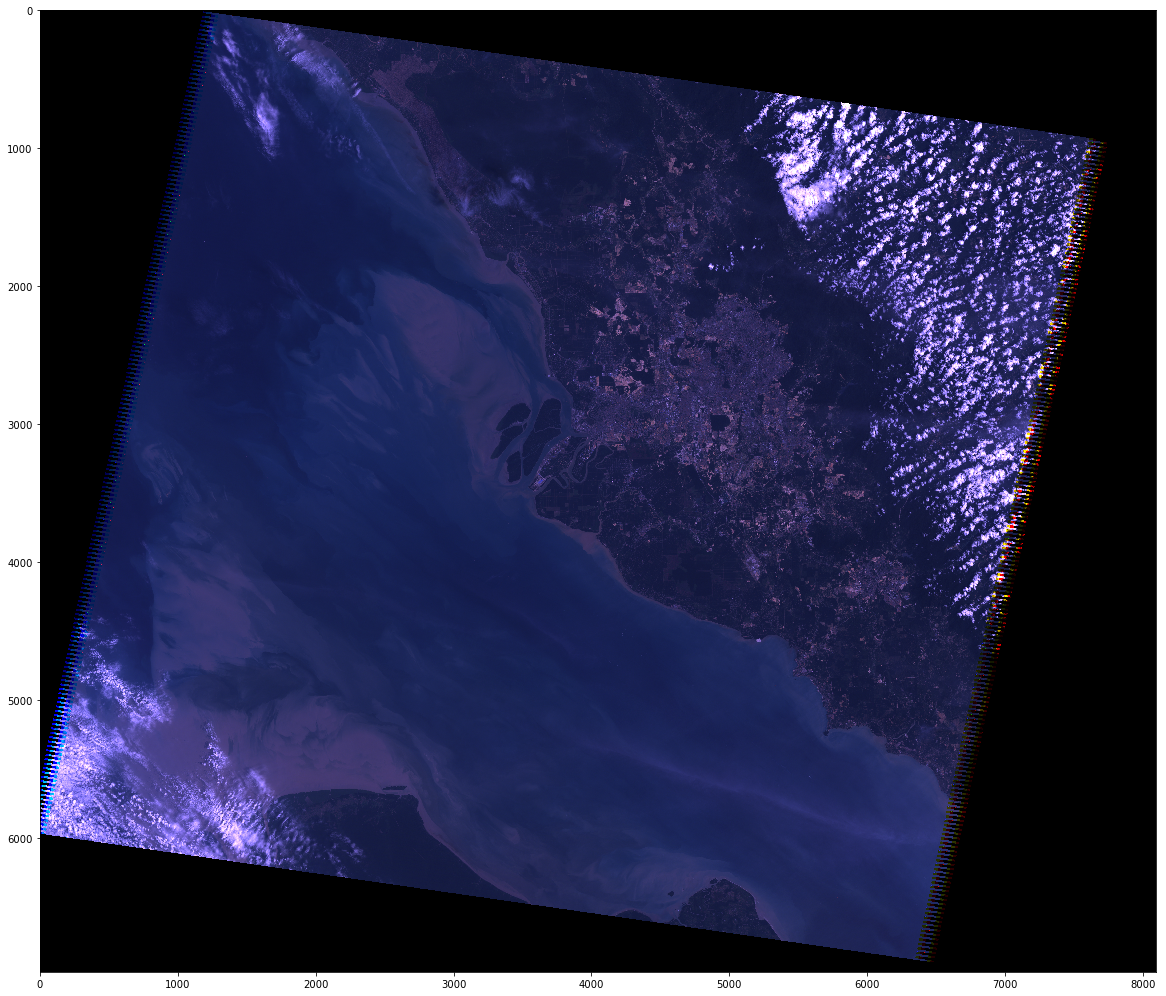

In [6]:
#Plotting an RGB composite in rasterio
# Read the grid values into numpy arrays
bluea = blue.read(1)
greena = green.read(1)
reda = red.read(1)
nira = nir.read(1)

print('Band Statistics')
print('Red:  ',reda.min(), '-', reda.max(), 'mean:', reda.mean())
print('Green:',greena.min(), '-', greena.max(), 'mean:', greena.mean())
print('Blue: ',bluea.min(), '-', bluea.max(), 'mean:', bluea.mean())
print('NIR:  ',nira.min(), '-', nira.max(), 'mean:', nira.mean())

# Create RGB  color composite stack
rgb = np.dstack((reda, greena, bluea))

# Let's see how our color composite looks like
fig, (ax6) = plt.subplots(1, 1, figsize=(20,20))
plt.imshow(rgb)


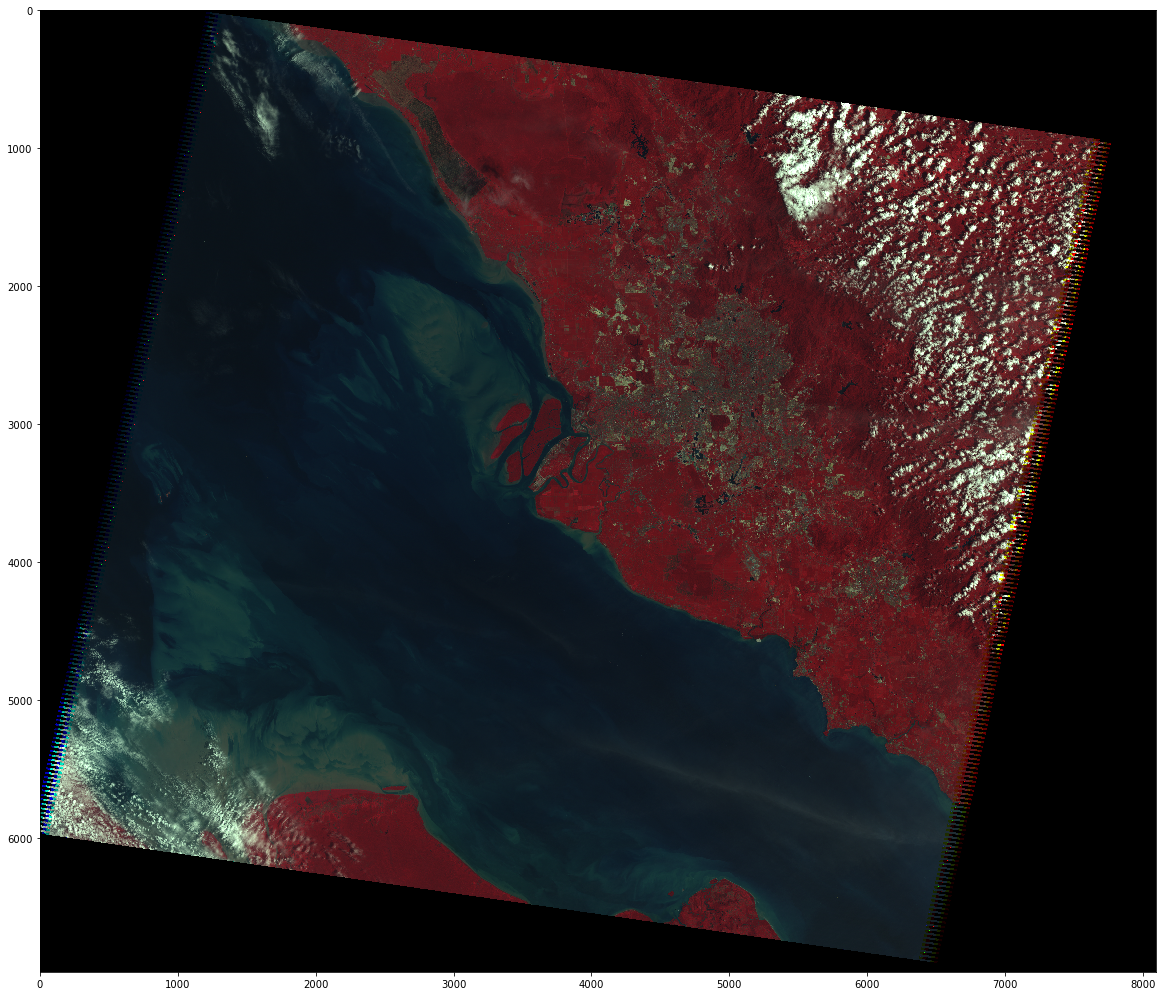

In [7]:
# Create False Color Composite array stack
fcc = np.dstack((nira,reda, greena))

# Let's see how our color composite looks like
fig, (ax6) = plt.subplots(1, 1, figsize=(20,20))
plt.imshow(fcc)


# Image display - DESCRIPTIVE STATISTICS

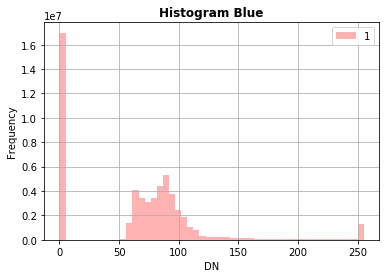

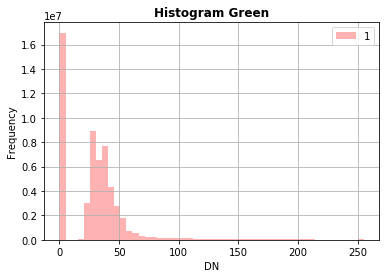

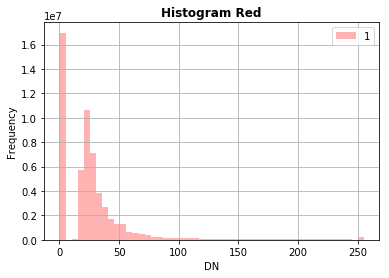

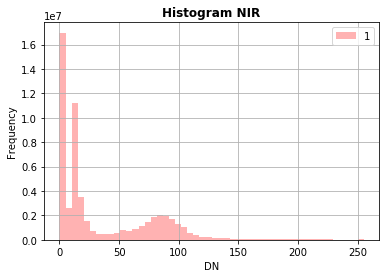

In [8]:
# Now let's have a look at the image statistics (histograms) using rasterio
from rasterio.plot import show_hist

show_hist((blue), bins=50, lw=0.0, stacked=False, alpha=0.3,
      histtype='stepfilled', title="Histogram Blue")
show_hist((green), bins=50, lw=0.0, stacked=False, alpha=0.3,
      histtype='stepfilled', title="Histogram Green")
show_hist((red), bins=50, lw=0.0, stacked=False, alpha=0.3,
      histtype='stepfilled', title="Histogram Red")
show_hist((nir), bins=50, lw=0.0, stacked=False, alpha=0.3,
      histtype='stepfilled', title="Histogram NIR")

# Image Display - QUESTION A

### The previous Red, Green and Blue image display code from the SINGLE BAND DISPLAY above is repeated here but with a slight difference; *vmax and vmin* are included.

### _Question_: In the following cell, below the code, create a similar image display of the Blue, Green and Red bands in a grey scale that have a your own defined contrast stretch using the information in the histograms above. _hint_: copy and paste the code below and make the adjustments that increase the contrast.

### To Submit: take a screen shot of the cell below with your added code and the enhanced contrast stretched data

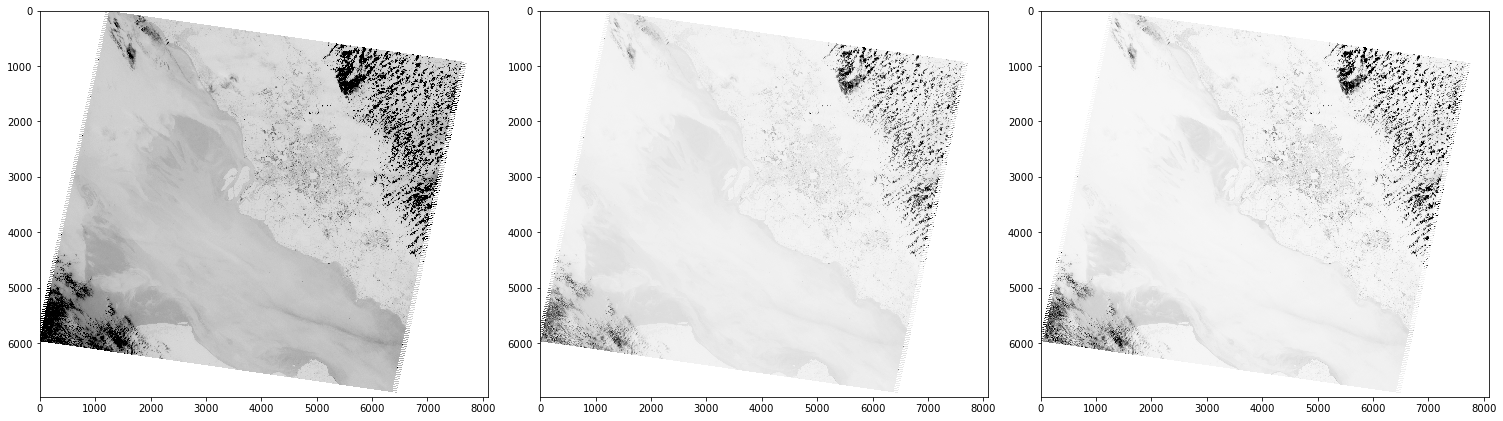

In [9]:
# Creating a multiple band representation, greyscale
fig, (ax4, ax5, ax6) = plt.subplots(1, 3, figsize=(21, 7))
plot.show(blue, ax=ax4, cmap='Greys',vmin=0,vmax=255) #blue
plot.show(green,  ax=ax5, cmap='Greys',vmin=0,vmax=255) #green
plot.show(red,  ax=ax6, cmap='Greys',vmin=0,vmax=255) #red
fig.tight_layout()


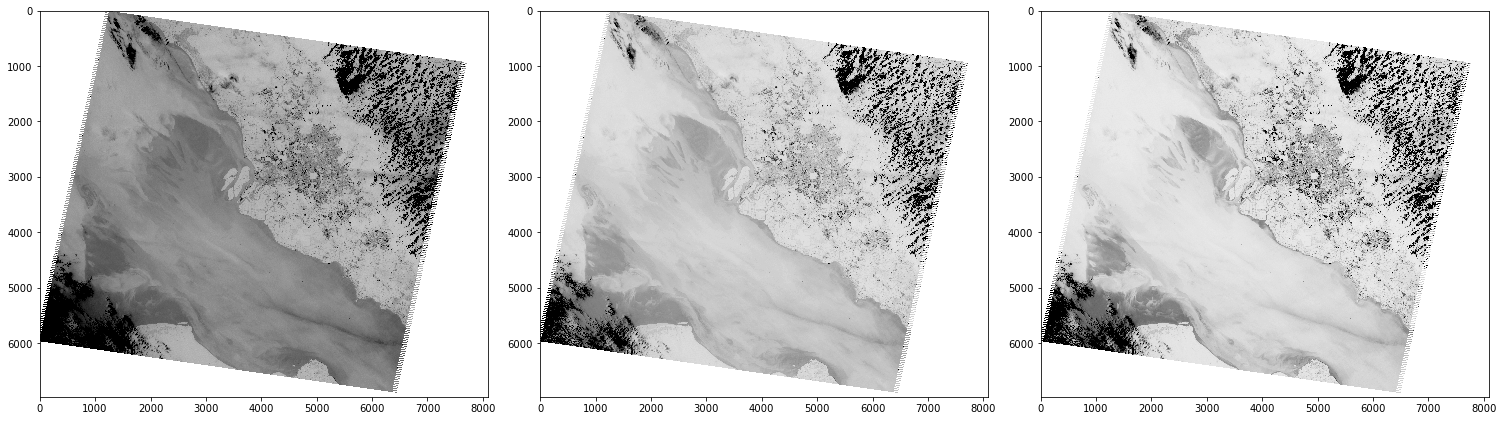

In [18]:
# Creating a multiple band representation, greyscale
fig, (ax4, ax5, ax6) = plt.subplots(1, 3, figsize=(21, 7))
plot.show(blue, ax=ax4, cmap='Greys',vmin=0,vmax=160) #blue
plot.show(green,  ax=ax5, cmap='Greys',vmin=0,vmax=110) #green
plot.show(red,  ax=ax6, cmap='Greys',vmin=0,vmax=110) #red
fig.tight_layout()
